In [24]:
import math
import glob
import numpy as np
import pandas as pd
import json
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape
from datetime import datetime
import mapclassify as mc
import matplotlib.colors as mcolors
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import FancyArrowPatch
from matplotlib.patches import Polygon
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, RegularPolygon, Rectangle
from matplotlib.lines import Line2D


In [25]:
def add_north(ax, labelsize=12, loc_x=0.95, loc_y=0.95, width=0.04, height=0.07, pad=0.1):
    """
    Draw a compass arrow and add the 'N' text annotation
    :param ax: The coordinate area to be drawn. Axes instance plt.gca() can be obtained
    :param labelsize: The size of the 'N' text
    :param loc_x: The horizontal ratio of the lower part of the text to the entire ax
    :param loc_y: The vertical ratio of the lower part of the text to the entire ax
    :param width: The width of the compass in ax
    :param height: The height of the compass in ax
    :param pad: The gap between the text symbol and the ax ratio
    :return: None
    """
    minx, maxx = ax.get_xlim()
    miny, maxy = ax.get_ylim()
    ylen = maxy - miny
    xlen = maxx - minx
    

    left = [minx + xlen*(loc_x - width*.5), miny + ylen*(loc_y - pad)]
    right = [minx + xlen*(loc_x + width*.5), miny + ylen*(loc_y - pad)]
    top = [minx + xlen*loc_x, miny + ylen*(loc_y - pad + height)]
    center = [minx + xlen*loc_x, left[1] + (top[1] - left[1])*.4]
    

    triangle = mpatches.Polygon([left, top, right, center], closed=True, facecolor='white', edgecolor='black')
    

    ax.add_patch(triangle)
    

    ax.text(s='N',
            x=minx + xlen*loc_x,
            y=miny + ylen*(loc_y - pad + height),
            fontsize=labelsize,
            horizontalalignment='center',
            verticalalignment='bottom')

In [26]:
import matplotlib as mpl

#Times New Roman
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']

# read the data

In [27]:
london_boundary = gpd.read_file('Data/ESRI/LB.shp').to_crs('EPSG:27700')
unique_ori = gpd.read_file('unique_ori.geojson').to_crs('EPSG:27700')
poi= gpd.read_file('poi_name.geojson')
new_poi= gpd.read_file('Data/Optimal_result/res_3/new_ed.geojson')
cent= gpd.read_file('centroids.geojson')


In [28]:
hex8 =  gpd.read_file('level8_hexagons.geojson').to_crs('EPSG:27700')

In [29]:
poi

,id,ref_no,name,pointx_cla,groupname,categoryna,classname,feature_ea,feature_no,pos_accura,...,admin_boun,telephone_,url,brand,qualifier_,qualifie_1,provenance,supply_dat,poi_name,geometry
0,51893.0,43506543.0,Collis Primary School,05310375,Education,"Primary, Secondary and Tertiary Education","First, Primary and Infant Schools",516542.3,170589.3,1.0,...,Richmond upon Thames London Boro,02089771458,www.collis.richmond.sch.uk/,None,None,None,Edubase,2023-03-01,Education,POINT (516542.300 170589.300)
1,290512.0,161051569.0,Sports Facility,04240302,Sport,Sports Complex,"Sports Grounds, Stadia and Pitches",516769.0,170584.0,2.0,...,Richmond upon Thames London Boro,None,None,None,None,None,Ordnance Survey,2023-03-01,Sport,POINT (516769.000 170584.000)
2,2655.0,16431497.0,Dr Childs & Partner,05280369,Health,Health Practitioners and Establishments,Doctors Surgeries,516472.0,171160.0,1.0,...,Richmond upon Thames London Boro,02086144930,None,None,None,None,Wilmington Healthcare Ltd,2023-03-01,GP services,POINT (516472.000 171160.000)
3,8283.0,162157874.0,Community Pharmacy (Pharmacy),05280364,Health,Health Practitioners and Establishments,Chemists and Pharmacies,516472.0,171160.0,1.0,...,Richmond upon Thames London Boro,02089733000,None,None,None,None,Wilmington Healthcare Ltd,2023-03-01,Pharmacies,POINT (516472.000 171160.000)
4,208219.0,151357298.0,Sainsbury's Teddington High Street Local,09470699,Retail,"Food, Drink and Multi Item Retail",Convenience Stores and Independent Supermarkets,516496.0,171168.0,1.0,...,Richmond upon Thames London Boro,02089434032,www.sainsburys.co.uk,Sainsbury's Local,None,None,118 Information,2023-03-01,Food Retail,POINT (516496.000 171168.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16112,107859.0,78542656.0,Tesco Express,09470699,Retail,"Food, Drink and Multi Item Retail",Convenience Stores and Independent Supermarkets,531637.0,181460.0,1.0,...,City and County of the City of London,03450269874,www.tesco.com,Tesco Express,None,None,118 Information,2023-03-01,Food Retail,POINT (531637.000 181460.000)
16113,115766.0,75415133.0,Boots,05280364,Health,Health Practitioners and Establishments,Chemists and Pharmacies,531661.0,181104.0,1.0,...,City and County of the City of London,02073296702,www.boots.com,Boots,None,None,118 Information,2023-03-01,Pharmacies,POINT (531661.000 181104.000)
16114,219453.0,160757543.0,Sainsbury's London Paternoster Square Local,09470699,Retail,"Food, Drink and Multi Item Retail",Convenience Stores and Independent Supermarkets,531999.0,181260.0,1.0,...,City and County of the City of London,02074898915,www.sainsburys.co.uk,Sainsbury's Local,None,None,118 Information,2023-03-01,Food Retail,POINT (531999.000 181260.000)
16115,137023.0,104051769.0,Tesco Express,09470699,Retail,"Food, Drink and Multi Item Retail",Convenience Stores and Independent Supermarkets,531722.0,181622.0,1.0,...,City and County of the City of London,03456719255,www.tesco.com,Tesco Express,None,None,118 Information,2023-03-01,Food Retail,POINT (531722.000 181622.000)


In [30]:
poi_ed = poi[poi['poi_name']== 'Education']

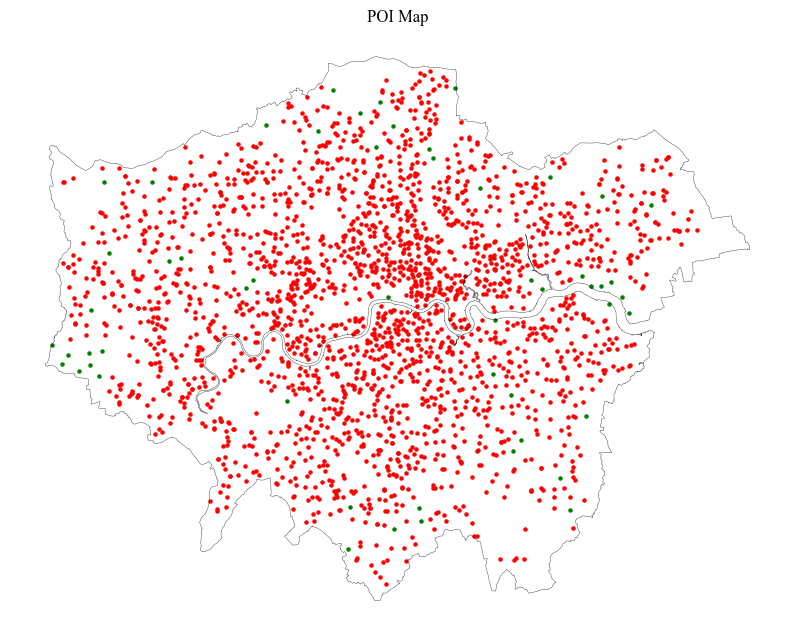

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
#dis.plot(ax=ax, edgecolor='black', facecolor='lightblue', alpha=0.5, label='Protected Areas')
#poi.plot(column='type', ax=ax, cmap='Set1', markersize=5, legend=True)
poi_ed .plot(ax=ax, color='red', markersize=5, label='Exsting Facilities')
new_poi.plot(ax=ax, color='green', markersize=5, label='New Facilities')
london_boundary.plot(ax=ax, color='none', edgecolor='black', linewidth=0.3, aspect='equal',alpha=0.8)
ax.set_title('POI Map')
ax.set_axis_off()
plt.show()

In [32]:
cur= gpd.read_file('Data/Optimal_result/res_2/current_res_sp.geojson').to_crs('EPSG:27700')
opt= gpd.read_file('Data/Optimal_result/res_3/opt_res_sp.geojson').to_crs('EPSG:27700')

In [33]:
opt["average_distance"].describe()

count    1166.000000
mean      478.429848
std       258.679605
min        15.972955
25%       306.893583
50%       466.781082
75%       582.358515
max      2082.489294
Name: average_distance, dtype: float64

In [34]:
cur["average_distance"].describe()

count     914.000000
mean      561.831636
std       359.482737
min        15.972955
25%       299.045966
50%       498.704703
75%       726.311782
max      2475.089836
Name: average_distance, dtype: float64

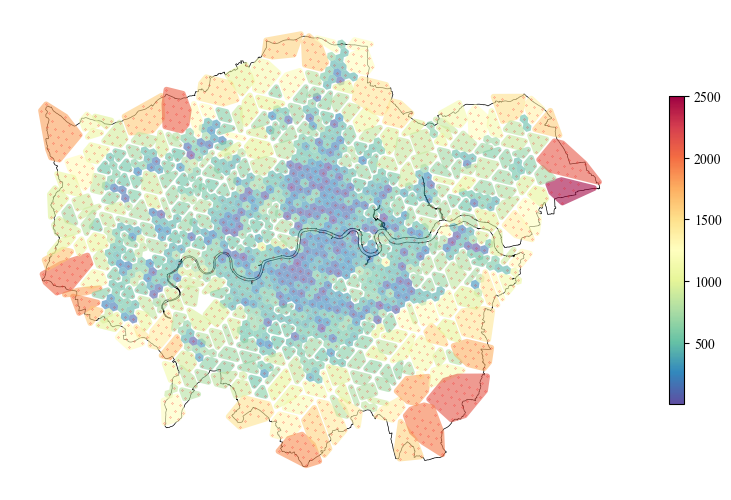

In [35]:

fig, ax = plt.subplots(figsize=(10, 10))

fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)


vmin = 10  
vmax = 2500 

#poi_sport.plot(column='poi_name', ax=ax, legend=True, cmap='viridis',markersize=1)
london_boundary.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5, aspect='equal')#,alpha=0.7)
#merged.plot(column= 'average_distance',ax=ax,  cmap='viridis', edgecolor='grey')
cur.plot(
    column='average_distance',
    ax=ax,
    cmap='Spectral_r', #Spectral_r #YlOrRd
    #edgecolor=None,
    alpha=0.6,
    legend=True,
    legend_kwds={'shrink': 0.4},
    vmin=vmin,  
    vmax=vmax
)

unique_ori.plot(ax=ax, color='red', markersize=0.03, label='Existing Facilities')
#ax.set_title('(a) Existing Scenario', fontsize=16)
ax.set_axis_off()

plt.show()

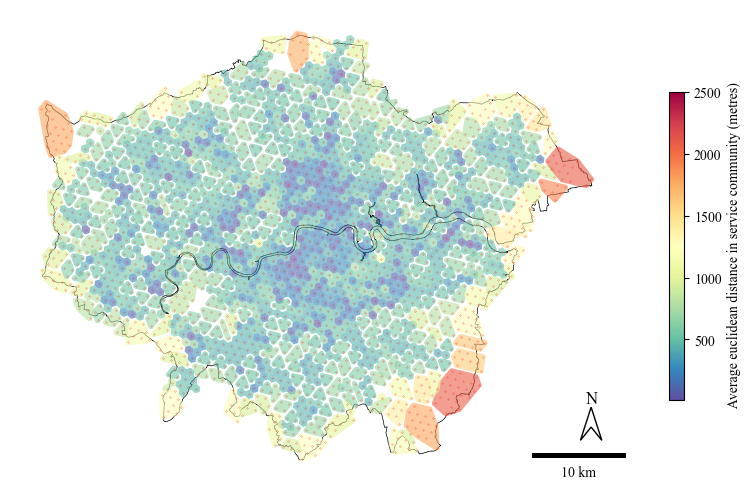

In [36]:

fig, ax = plt.subplots(figsize=(10, 10))

fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)


vmin = 10  
vmax = 2500 

#poi_sport.plot(column='poi_name', ax=ax, legend=True, cmap='viridis',markersize=1)
london_boundary.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5, aspect='equal')#,alpha=0.7)
#merged.plot(column= 'average_distance',ax=ax,  cmap='viridis', edgecolor='grey')
opt.plot(
    column='average_distance',
    ax=ax,
    cmap='Spectral_r', #Spectral_r #YlOrRd
    #edgecolor=None,
    alpha=0.6,
    legend=True,
    legend_kwds={'shrink': 0.4,'label': ' Average euclidean distance in service community (metres)'},
    vmin=vmin,
    vmax=vmax
)
import matplotlib.pyplot as plt


legend = plt.gca().get_legend()

if legend:  
  
    for text in legend.get_texts():
        text.set_fontsize(30) 

    
    legend.set_title('Average euclidean distance in service community (metres)', prop={'size': 30})

# Legend 

#legend_patches = [ plt.Line2D([0], [0], color='red', marker='o', markersize=3, linestyle='', label='Origin Centroid'),
#RegularPolygon((0, 0), numVertices=6, radius=0.01, orientation=np.pi/6, color='#85B7D6', label='Service Community'),
##Rectangle((0, 0), 1, 1, facecolor='white', edgecolor='#cccccc', linewidth=1, label='London Boundary')]

#plt.legend(handles=legend_patches, loc='lower left', #title='Legend',bbox_to_anchor=(1.05, 1),fontsize=16, title_fontsize=18)

scalebar = ScaleBar(1, units='m', scale_loc='bottom', location='lower right')
ax.add_artist(scalebar)

add_north(ax, labelsize=12, loc_x=0.95, loc_y=0.23, width=0.035, height=0.07, pad=0.14)

unique_ori.plot(ax=ax, color='red', markersize=0.03, label='Existing Facilities')
#ax.set_title('(b) Optimal Scenario', fontsize=16)
ax.set_axis_off()

plt.show()

In [37]:
cur_re = gpd.read_file('Data/Optimal_result/res_2/dis/dis_ed.geojson')
cur_re = cur_re.set_crs('EPSG:27700', allow_override=True)
opt_re = gpd.read_file('Data/Optimal_result/res_3/dis/dis_pot_ed.geojson')
opt_re= opt_re.set_crs('EPSG:27700', allow_override=True)

In [38]:
cur_re = cur_re.merge(cent, on='geometry')
opt_re = opt_re.merge(cent, on='geometry')

In [39]:
merged_df = cur_re.merge(opt_re, on='id', suffixes=('_cur', '_opt'))
merged_df = merged_df.merge(hex8, left_on='id',right_on='hex_8')


### optimisation ratio for each origin
$$ r_{ia} = \log{ \frac{l_{ia}}{\hat{l_{ia}}}} $$

where, $r_{ia}$ is the logarithmic optimisation ratio for origin $i$ to the nearest amenity of type $a$, $l_{ia}$ is the shortest distance from origin $i$ to the nearest amenity of type $a$ in the existing scenario, $\hat{l_{ia}}$ is the shortest distance from origin $i$ to the nearest amenity of type $a$ in the optimal scenario.

In [40]:

merged_df['Distance_gap'] = merged_df['Distance_cur'] - merged_df['Distance_opt']
merged_df['Distance_Ratio'] = merged_df['Distance_cur'] / merged_df['Distance_opt']
merged_df['Distance_Ratio_Log'] = np.log(merged_df['Distance_Ratio'] )#.replace(0, np.nan))


In [41]:
merged_df['Distance_Ratio_Log'].describe()

count    2492.000000
mean        0.045118
std         0.225061
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.603518
Name: Distance_Ratio_Log, dtype: float64

In [45]:
merged_df = gpd.GeoDataFrame(merged_df, geometry='geometry')

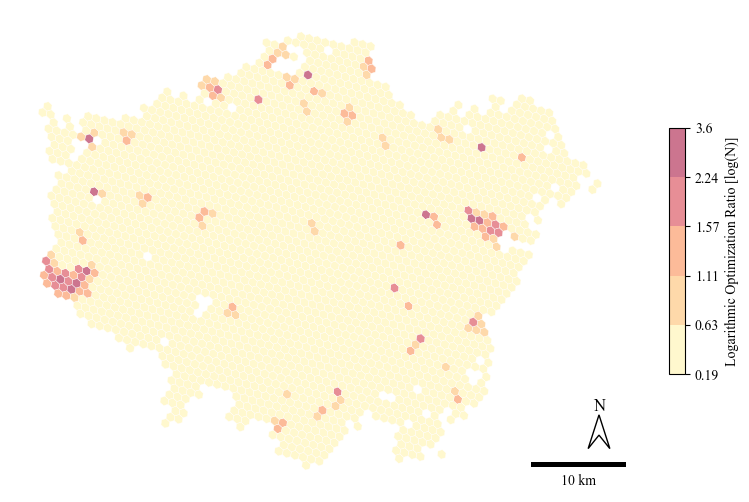

In [316]:

nb = mc.NaturalBreaks(merged_df['Distance_Ratio_Log'], k=6)
merged_df['nb_class'] = nb.yb

colors = ['#FFF8CE','#FED9AA','#FCBB99','#E78E96','#CC758F']
#colors = ['#FCF2D6', '#FDE4AF', '#FBD18B', '#F9BD6F', '#F7A049'] '#FFE8B6'
cmap = mcolors.ListedColormap(colors)
#'#DBDBDB', '#FCF2D6', '#FDE4AF', '#FBD18B', '#F9BD6F', '#F7A049'
# Create a plot
fig, ax = plt.subplots(figsize=(10, 8))

fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

merged_df.plot(column='nb_class', cmap=cmap, linewidth=0.3, edgecolor='white', ax=ax, legend=False)


bounds = nb.bins  
norm = mcolors.BoundaryNorm(bounds, cmap.N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax, shrink=0.4, aspect=15)  
cbar.set_label('Logarithmic Optimization Ratio [log(N)]')


tick_labels = [f'{round(bound, 2)}' for bound in bounds]
cbar.ax.set_yticklabels(tick_labels)



scalebar = ScaleBar(1, units='m', scale_loc='bottom', location='lower right')
ax.add_artist(scalebar)

add_north(ax, labelsize=12, loc_x=0.95, loc_y=0.23, width=0.035, height=0.07, pad=0.14)


#plt.title('(a) The Number of Non-work Trips by Destination Hexagon in GLA, March 2023 (N= 2625)', fontsize=15)
plt.axis('off')


plt.show()
